In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
def read_images(folder="images/"):
    files = [x for x in os.listdir(folder) if x.endswith('.jpg') or x.endswith('.jpeg') \
             or x.endswith('.png')]
    
    list_imgs = []
    for file in files:
        file = folder + file
        img = cv2.imread(file, 1)
        if(img is None):
            print("Skipping, unable to read: {}".format(file))
            continue
        list_imgs.append(img)
        
    return list_imgs

In [14]:
# Example
imgs = read_images("/Users/krshrimali/Documents/clouds/")

In [15]:
len(imgs)

2

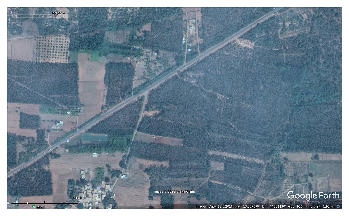

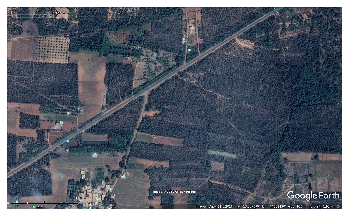

In [21]:
for i in range(len(imgs)):
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

**Note**:

    Image ID 0: With cloud
    Image ID 1: Without cloud

**Idea 1**: Apply *deblurring* on "with cloud" images

**Idea 2**: Apply *denoising* on "with cloud" images

In [23]:
# Save the images into meaningful variables
with_cloud_img = imgs[0]
img_without_cloud = imgs[1]

## Idea 1

Detection of Blurring. An image with cloud, will have less detail and more smoothening. So blurring detection can help to deblur later.

In [24]:
# Apply deblurring
# Source: https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

In [25]:
def variance_of_laplacian(img):
    # This computes variance of the image and then returns the focus measure
    # The focus measure is simply the variance of the laplacian
    return cv2.Laplacian(img, cv2.CV_64F).var()

In [26]:
gray_with_cloud = cv2.cvtColor(with_cloud_img, cv2.COLOR_BGR2GRAY)
gray_without_cloud = cv2.cvtColor(img_without_cloud, cv2.COLOR_BGR2GRAY)

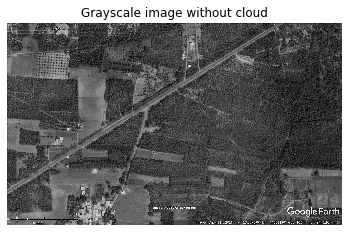

In [30]:
plt.imshow(gray_without_cloud, cmap='gray')
plt.axis('off')
plt.title("Grayscale image without cloud");

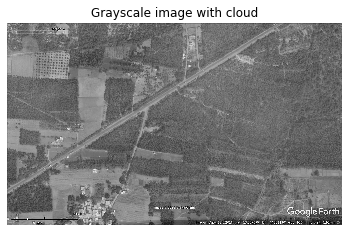

In [31]:
plt.imshow(gray_with_cloud, cmap='gray')
plt.axis('off')
plt.title("Grayscale image with cloud");

In [32]:
fm_with_cloud = variance_of_laplacian(gray_with_cloud)
fm_without_cloud = variance_of_laplacian(gray_without_cloud)

In [35]:
threshold = 850 # This is the threshold set manually, to detect blurring
if(fm_with_cloud < threshold):
    print("Blurry")
else:
   print("Non-blurry") 

Blurry


In [38]:
x = ['with_cloud', 'without_cloud']
for index, fm in enumerate([fm_with_cloud, fm_without_cloud]):
    print("Variance of Laplacian for: {} is {}".format(x[index], fm))

Variance of Laplacian for: with_cloud is 706.8135466299143
Variance of Laplacian for: without_cloud is 957.7481382753532


**Detection of Blurring**: This is important, and to what extend the image is blurred. Just a step to realize, if there is any feature to find amount of blurring.

**Source:** https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

## Idea 2

Trying to denoise, and then changing contrast & brightness by converting to HSV. The V channel can be changed for changing contrast.

In [57]:
# Denoising
dst = cv2.fastNlMeansDenoisingColored(with_cloud_img, 7, 10)

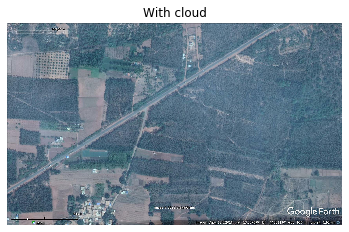

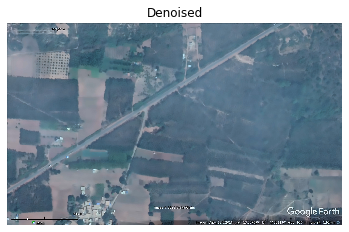

In [68]:
plt.imshow(cv2.cvtColor(with_cloud_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("With cloud");
plt.show()


plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Denoised")
plt.show()

**Changing contrast and brightness** on original image (with cloud).

Changing contrast by 0.8 and adding brightness of 0.1

In [164]:
contrast = 0.8
brightness = 0.1

In [165]:
hsv_img = cv2.cvtColor(with_cloud_img, cv2.COLOR_BGR2HSV)

In [166]:
hsv_img[:, :, 2] = hsv_img[:, :, 2] * contrast + brightness

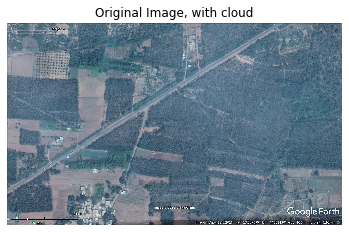

In [167]:
plt.imshow(cv2.cvtColor(with_cloud_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original Image, with cloud")
plt.show()

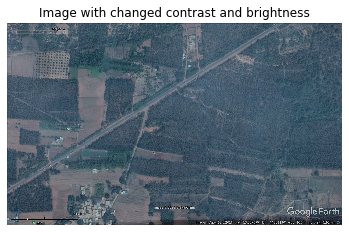

In [168]:
plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.title("Image with changed contrast and brightness")
plt.show()

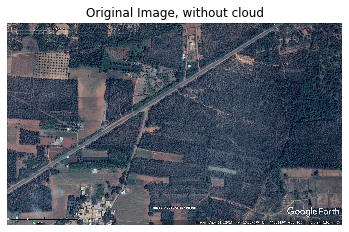

In [169]:
plt.imshow(cv2.cvtColor(img_without_cloud, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original Image, without cloud")
plt.show()